In [138]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.graph_objects as go
from plotly.subplots import make_subplots



df_original=pd.read_csv("online_retail_II.csv")
df=df_original.copy()
df.shape
df.info()
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [104]:
# most have eqaul row but there is some missing on Description and custid 
# description is hardly used

for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].str.strip()
df=df.dropna(subset=["Description"])
#even though lots of missing value in customerID will not  touch it 
df["start"]=df["Invoice"].str[0]
df[["Invoice","start"]].head()
check_invoice=set(df["start"])
check_invoice
 
#checking starter when start=c it is cncelled and quantity is neg
Adjust_debt=df[df["Price"]<0].copy()
Adjust_debt
 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1027017 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1027017 non-null  object        
 1   StockCode    1027017 non-null  object        
 2   Description  1027017 non-null  object        
 3   Quantity     1027017 non-null  int64         
 4   InvoiceDate  1027017 non-null  datetime64[ns]
 5   Price        1027017 non-null  float64       
 6   Customer ID  797815 non-null   float64       
 7   Country      1027017 non-null  object        
 8   start        1027017 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 78.4+ MB


In [102]:
df=df.drop_duplicates()
df_neg_qnt=df[df["Quantity"]<0]
check=df[(df["Quantity"]<0)&(df["start"]!="C")]
# qnt neg and absent customer id so i have to remove them
df=pd.concat([df,check]).drop_duplicates(keep=False)
cancelled=df[(df["Quantity"]<0)&(df["start"]=="C")].copy()
cancelled
# deal with neg price
# look at this these are adjusted bad debt (neg is coming from ABD only)
#Adjusted Bad Debt" refers to writing off amounts the company 
#no longer expects to collect from customers — like refunds, failed payments,
#or cancelled invoices — and adjusting their books accordingly.
# we take them out
# invoice,quantity,price is done
df=df[df["Price"]>0]

df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1027017 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1027017 non-null  object        
 1   StockCode    1027017 non-null  object        
 2   Description  1027017 non-null  object        
 3   Quantity     1027017 non-null  int64         
 4   InvoiceDate  1027017 non-null  datetime64[ns]
 5   Price        1027017 non-null  float64       
 6   Customer ID  797815 non-null   float64       
 7   Country      1027017 non-null  object        
 8   start        1027017 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 78.4+ MB


In [108]:
#sales analysis
Most_expesive_product = df.loc[df["Price"]==df["Price"].max()]
# invoice starts with c, quantity is -1 so it is returned order /cancelled order
Most_expesive_product

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,start
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom,C


In [110]:
Least_expn_product=df.loc[df["Price"]==df["Price"].min()].reset_index(drop=True)
Least_expn_product

df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")


In [290]:

Least_expn_product =Least_expn_product.groupby("Description")["Quantity"].sum().reset_index(name="qty")
Least_expn_product

,Description,qty
0,Bank Charges,1
1,PADS TO MATCH ALL CUSHIONS,17


In [20]:
Biggest_order=df[df["Quantity"]==df["Quantity"].max()]
Biggest_order
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
# it is the biggest order 
 

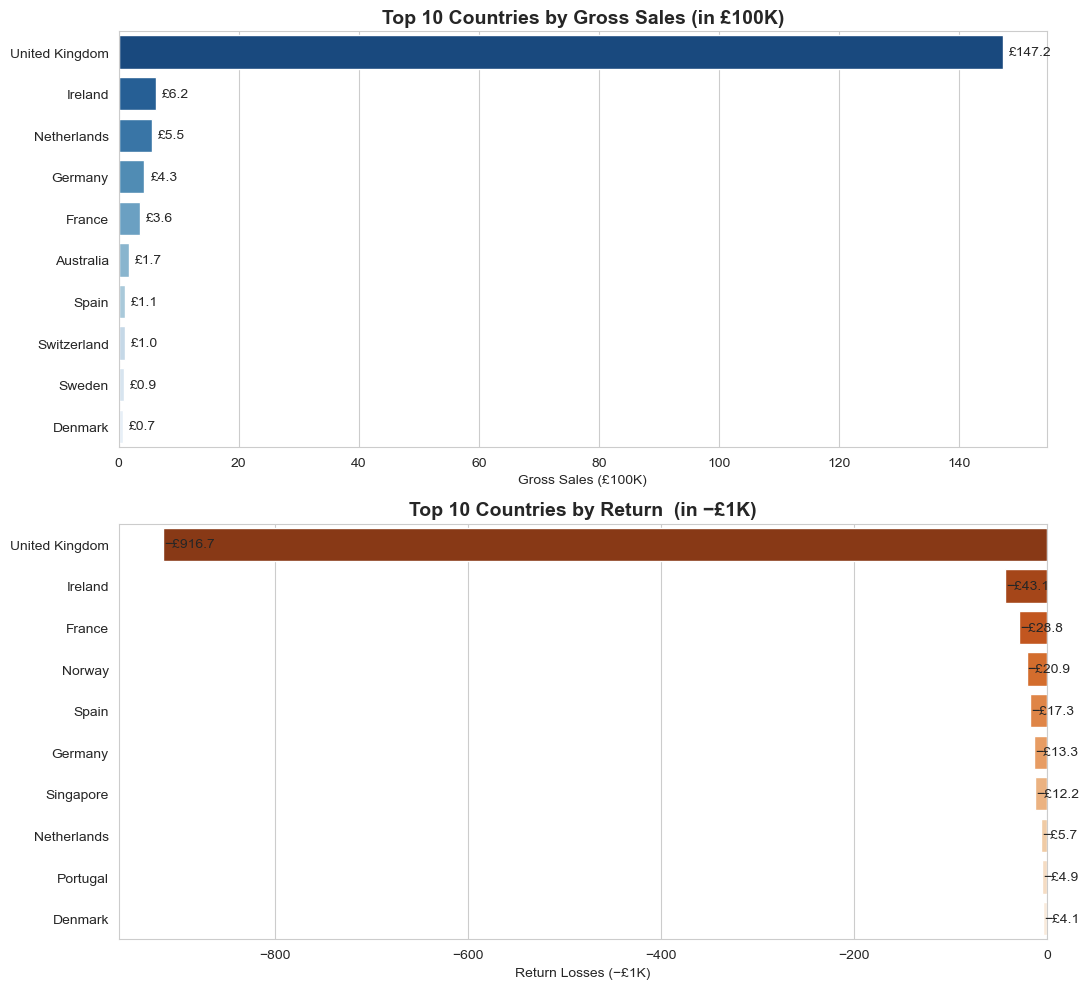

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  float64       
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   sale         824364 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [234]:
# Customer Analytics
 

df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Quantity"] = df["Quantity"].astype(float)
df["sale"] = df["Quantity"] * df["Price"]
df["Country"] = df["Country"].replace({"EIRE": "Ireland", "RSA": "South Africa", "USA": "United States"})

gross_sale = df[df["Quantity"] > 0].groupby("Country")["sale"].sum().sort_values(ascending=False)
return_sale = df[df["Quantity"] < 0].groupby("Country")["sale"].sum().sort_values()

top_10_sale = gross_sale.head(10) / 1e5
top_10_return = return_sale.head(10) / 1e3

df_gross = top_10_sale.reset_index()
df_gross.columns = ['Country', 'Gross_Sale_100K']

df_return = top_10_return.reset_index()
df_return.columns = ['Country', 'Return_Loss_1K']

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(11, 10))

sns.barplot(data=df_gross, x='Gross_Sale_100K', y='Country', hue='Country', dodge=False, palette='Blues_r', ax=axes[0], legend=False)
axes[0].set_title("Top 10 Countries by Gross Sales (in £100K)", fontsize=14, weight='bold')
axes[0].set_xlabel("Gross Sales (£100K)")
axes[0].set_ylabel("")
for i, v in enumerate(df_gross["Gross_Sale_100K"]):
    axes[0].text(v + 1, i, f"£{v:.1f}", va='center', fontsize=10)

sns.barplot(data=df_return, x='Return_Loss_1K', y='Country', hue='Country', dodge=False, palette='Oranges_r', ax=axes[1], legend=False)
axes[1].set_title("Top 10 Countries by Return  (in −£1K)", fontsize=14, weight='bold')
axes[1].set_xlabel("Return Losses (−£1K)")
axes[1].set_ylabel("")
for i, v in enumerate(df_return["Return_Loss_1K"]):
    axes[1].text(v + 1, i, f"−£{abs(v):.1f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()
df.info()

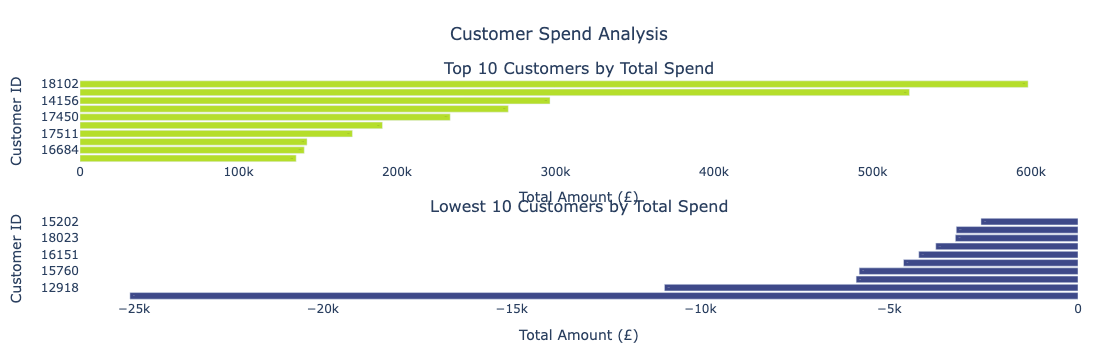

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  float64       
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   sale         824364 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 62.9+ MB


In [236]:
#ow will do customer side
cancelled=cancelled.dropna().copy()
cancelled[cancelled["Quantity"]>0] # empty so all negative are cancelled order
cust=df.dropna().copy()# remove row\
cust["Customer ID"]=cust["Customer ID"].astype(int)
max_purchase_customer=cust.groupby("Customer ID")["sale"].sum().sort_values(ascending=False).head(10).copy()
min_purchse_customer=cust.groupby("Customer ID")["sale"].sum().sort_values(ascending=True).head(10).copy()
 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

palette = px.colors.sequential.Viridis

top10 = max_purchase_customer.sort_values(ascending=False)
bottom10 = min_purchse_customer.sort_values(ascending=False)

fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=("Top 10 Customers by Total Spend", "Lowest 10 Customers by Total Spend"),
    shared_xaxes=False
)

fig.add_trace(
    go.Bar(
        x=top10.values,
        y=top10.index.astype(str),
        orientation='h',
        marker=dict(color=palette[-2]),
        text=[f'£{x:,.0f}' for x in top10.values],
        textposition='inside'
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Bar(
        x=bottom10.values,
        y=bottom10.index.astype(str),
        orientation='h',
        marker=dict(color=palette[2]),
        text=[f'£{x:,.0f}' for x in bottom10.values],
        textposition='inside'
    ),
    row=2,
    col=1
)

fig.update_layout(
    height=700,
    showlegend=False,
    plot_bgcolor='white',
    title_text="Customer Spend Analysis",
    title_x=0.5,
    margin=dict(t=80, b=60, l=80, r=40)
)

fig.update_yaxes(autorange='reversed', title='Customer ID', row=1, col=1)
fig.update_yaxes(autorange='reversed', title='Customer ID', row=2, col=1)
fig.update_xaxes(title='Total Amount (£)', row=1, col=1)
fig.update_xaxes(title='Total Amount (£)', row=2, col=1)

fig.show()




In [ ]:
# we observe customer id 18102 has done higest spenfing and id 17399 does the lowest

In [240]:
sold_qty = (
    df[df['Quantity'] > 0]
    .groupby('Description', as_index=False)['Quantity']
    .sum()
    .rename(columns={'Quantity': 'Sold'})
)

returned_qty = (
    df[df['Quantity'] < 0]
    .groupby('Description', as_index=False)['Quantity']
    .sum()
    .rename(columns={'Quantity': 'Returned'})
)

product_return_rate = (
    pd.merge(sold_qty, returned_qty, on='Description', how='left')
    .fillna(0)
    .astype({'Sold': 'int', 'Returned': 'int'})
)

product_return_rate['Return Rate (%)'] = (
    product_return_rate['Returned'].abs() / product_return_rate['Sold']
    
) * 100


product_return_rate['Acceptance Rate (%)'] = 100 - product_return_rate['Return Rate (%)']
revenue=df.groupby("Description")["sale"].sum().reset_index().rename(columns={"sale":"Net sale"})

product_return_rate=pd.merge(product_return_rate,revenue,on="Description",how="left")
product_return_rate.describe()



,Sold,Returned,Return Rate (%),Acceptance Rate (%),Net sale
count,5283.000000,5283.000000,5283.000000,5283.000000,5283.000000
mean,2029.324437,-92.129472,4.245390,95.754610,3152.985188
std,5121.171379,1564.640754,32.353867,32.353867,8987.314981
min,1.000000,-80995.000000,0.000000,-1463.775510,-185153.230000
25%,92.000000,-22.000000,0.000000,97.923222,194.725000
50%,519.000000,-2.000000,0.289296,99.710704,845.220000
75%,1857.000000,0.000000,2.076778,100.000000,2823.660000
max,109169.000000,0.000000,1563.775510,100.000000,269736.700000


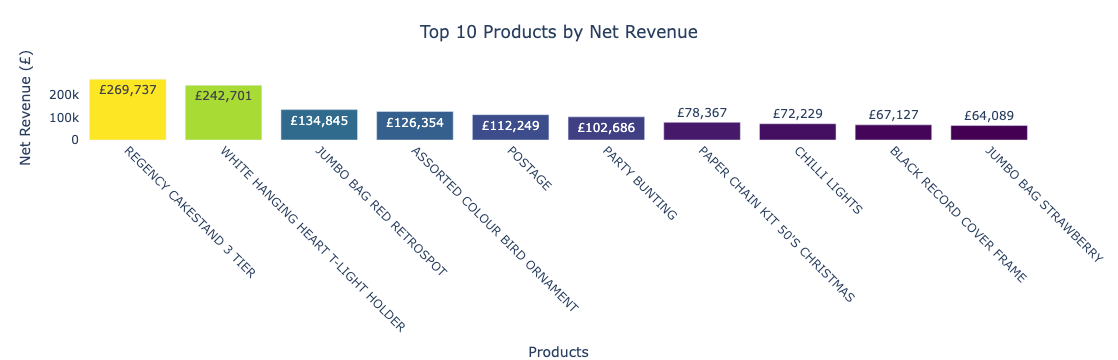

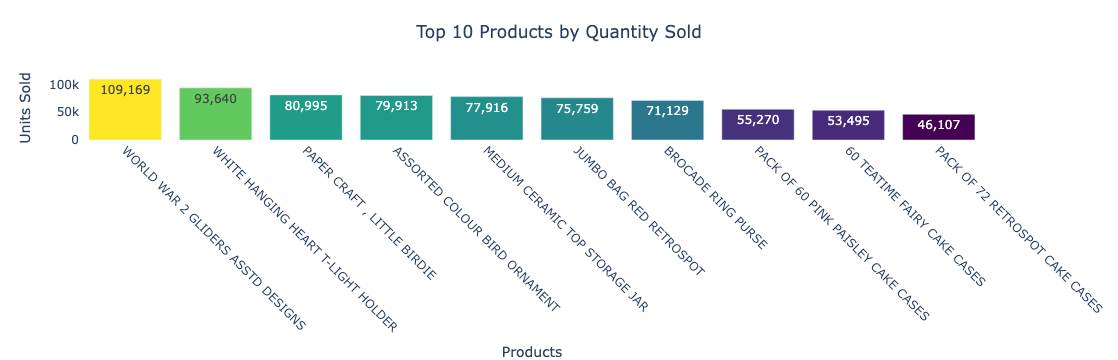

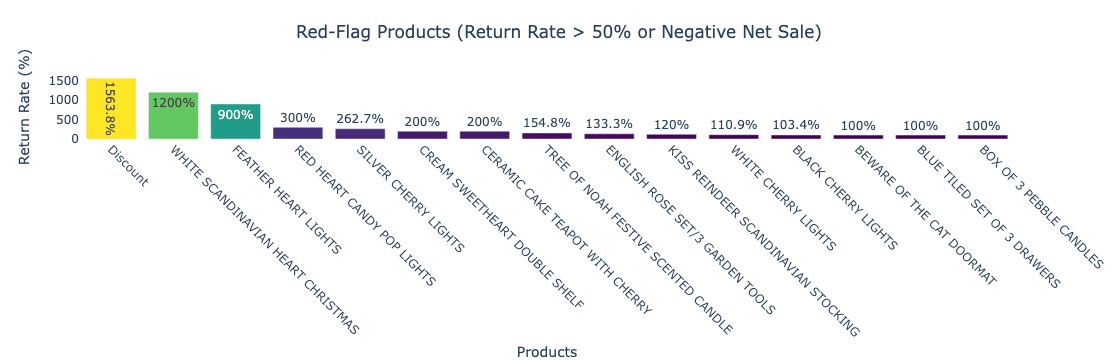

In [220]:
#Median Return Rate ≈ 0.29%, and 75% of products have ≤ 2.08% return rate.#
#Majority of products are not returned or rarely returned, meaning customer satisfaction is likely high.
 

palette = px.colors.sequential.Viridis

fig_rev = go.Figure(data=[
    go.Bar(
        name='Top 10 by Revenue',
        x=top_10p_byrev['Description'].astype(str),
        y=top_10p_byrev['Net sale'],
        marker=dict(color=top_10p_byrev['Net sale'], colorscale=palette),
        text=top_10p_byrev['Net sale'],
        textposition='auto',
        cliponaxis=False
    )
])

fig_rev.update_traces(texttemplate='£%{text:,.0f}', textfont_size=12)
fig_rev.update_layout(
    title='Top 10 Products by Net Revenue',
    title_x=0.5,
    xaxis_title='Products',
    yaxis_title='Net Revenue (£)',
    plot_bgcolor='white',
    showlegend=False,
    height=550,
    margin=dict(t=80, b=120)
)
fig_rev.update_xaxes(tickangle=45)
fig_rev.update_yaxes(range=[0, top_10p_byrev['Net sale'].max() * 1.15])
fig_rev.show()

fig_qty = go.Figure(data=[
    go.Bar(
        name='Top 10 by Quantity',
        x=top_10p_byqty['Description'].astype(str),
        y=top_10p_byqty['Sold'],
        marker=dict(color=top_10p_byqty['Sold'], colorscale=palette),
        text=top_10p_byqty['Sold'],
        textposition='auto',
        cliponaxis=False
    )
])

fig_qty.update_traces(texttemplate='%{text:,}', textfont_size=12)
fig_qty.update_layout(
    title='Top 10 Products by Quantity Sold',
    title_x=0.5,
    xaxis_title='Products',
    yaxis_title='Units Sold',
    plot_bgcolor='white',
    showlegend=False,
    height=550,
    margin=dict(t=80, b=120)
)
fig_qty.update_xaxes(tickangle=45)
fig_qty.update_yaxes(range=[0, top_10p_byqty['Sold'].max() * 1.15])
fig_qty.show()

fig_red = go.Figure(data=[
    go.Bar(
        name='Red-Flag Products',
        x=red_flag_products['Description'].astype(str),
        y=red_flag_products['Return Rate (%)'],
        marker=dict(color=red_flag_products['Return Rate (%)'], colorscale=palette),
        text=red_flag_products['Return Rate (%)'].round(1),
        textposition='auto',
        cliponaxis=False
    )
])

fig_red.update_traces(texttemplate='%{text}%', textfont_size=12)
fig_red.update_layout(
    title='Red-Flag Products (Return Rate > 50% or Negative Net Sale)',
    title_x=0.5,
    xaxis_title='Products',
    yaxis_title='Return Rate (%)',
    plot_bgcolor='white',
    showlegend=False,
    height=550,
    margin=dict(t=80, b=120)
)
fig_red.update_xaxes(tickangle=45)
fig_red.update_yaxes(range=[0, red_flag_products['Return Rate (%)'].max() * 1.15])
fig_red.show()



In [226]:
# red flag product have higher return and neg revenue


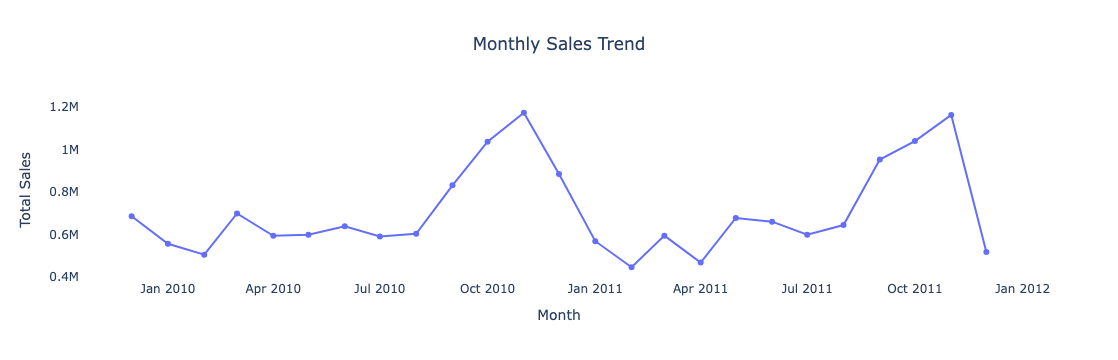

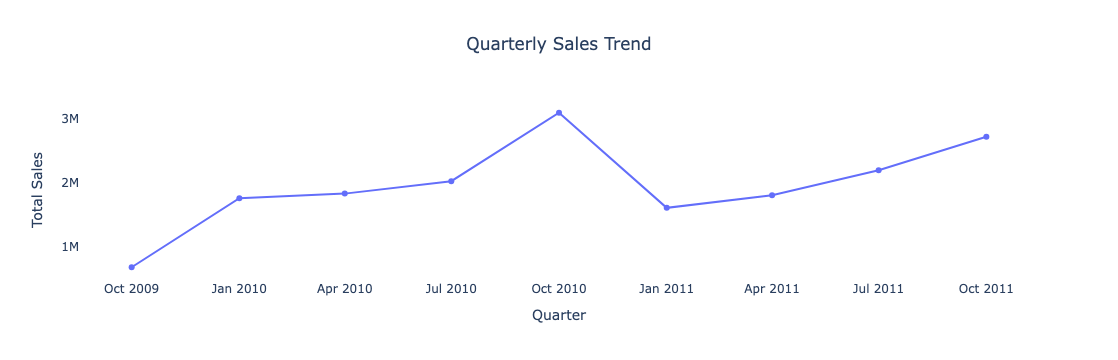

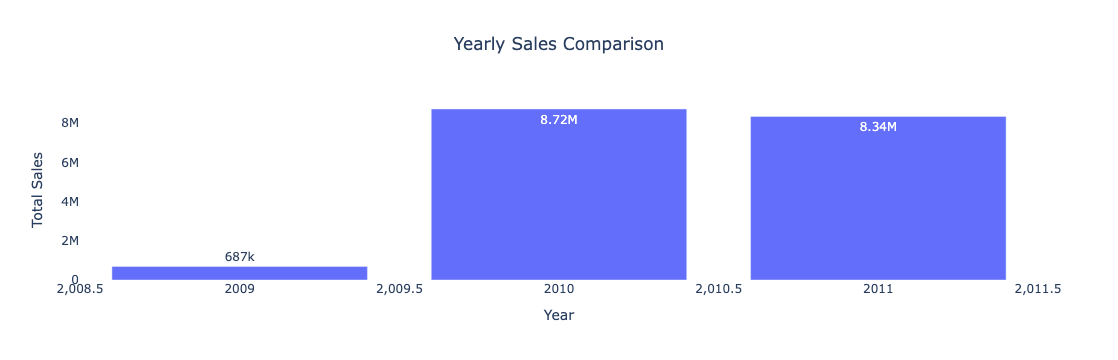

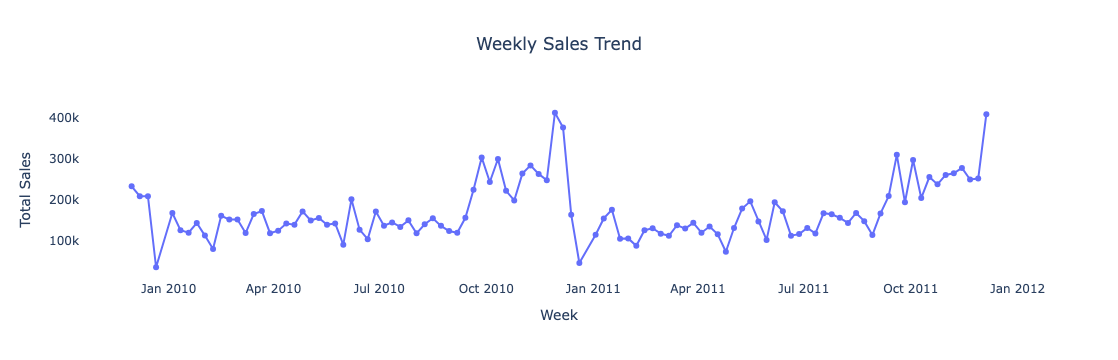

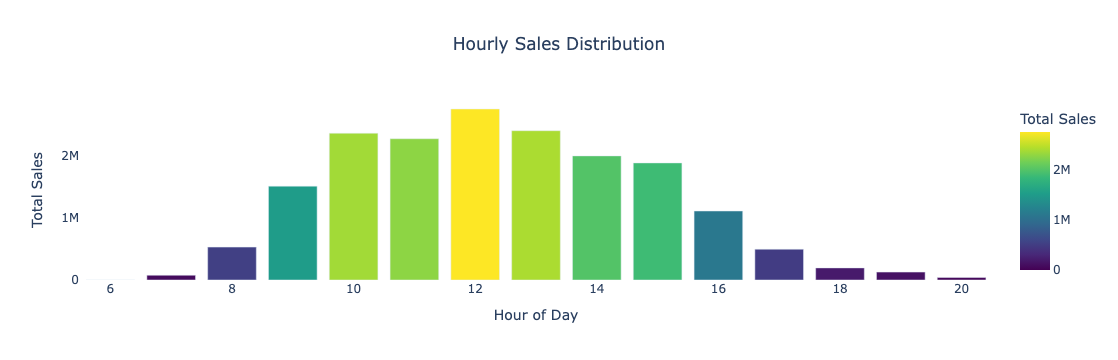

In [258]:
df = df[df["Quantity"] > 0].copy()
df["Month"] = df["InvoiceDate"].dt.to_period("M")
monthly_sale = df.groupby("Month")["sale"].sum().reset_index()
monthly_sale["Month"] = monthly_sale["Month"].dt.to_timestamp()

df["Quarter"] = df["InvoiceDate"].dt.to_period("Q")
quarterly_sales = df.groupby("Quarter")["sale"].sum().reset_index()
quarterly_sales["Quarter"] = quarterly_sales["Quarter"].dt.to_timestamp()

df["Year"] = df["InvoiceDate"].dt.year
yearly_sales = df.groupby("Year")["sale"].sum().reset_index()

df["Week"] = df["InvoiceDate"].dt.to_period("W")
weekly_sales = df.groupby("Week")["sale"].sum().reset_index()
weekly_sales["Week"] = weekly_sales["Week"].dt.to_timestamp()

df["Hour"] = df["InvoiceDate"].dt.hour
hourly_sales = df.groupby("Hour")["sale"].sum().reset_index()

 

fig_month = px.line(
    monthly_sale, x="Month", y="sale", markers=True,
    title="Monthly Sales Trend", 
    labels={"sale": "Total Sales", "Month": "Month"}
)
fig_month.update_layout(title_x=0.5, plot_bgcolor="white")
fig_month.show()

fig_quarter = px.line(
    quarterly_sales, x="Quarter", y="sale", markers=True,
    title="Quarterly Sales Trend",
    labels={"sale": "Total Sales", "Quarter": "Quarter"}
)
fig_quarter.update_layout(title_x=0.5, plot_bgcolor="white")
fig_quarter.show()

fig_year = px.bar(
    yearly_sales, x="Year", y="sale", text_auto=".3s",
    title="Yearly Sales Comparison",
    labels={"sale": "Total Sales", "Year": "Year"},
)
fig_year.update_layout(title_x=0.5, plot_bgcolor="white")
fig_year.show()

fig_week = px.line(
    weekly_sales, x="Week", y="sale", markers=True,
    title="Weekly Sales Trend",
    labels={"sale": "Total Sales", "Week": "Week"}
)
fig_week.update_layout(title_x=0.5, plot_bgcolor="white")
fig_week.show()

fig_hour = px.bar(
    hourly_sales, x="Hour", y="sale",
    title="Hourly Sales Distribution",
    labels={"sale": "Total Sales", "Hour": "Hour of Day"},
    color="sale", color_continuous_scale="Viridis"
)
fig_hour.update_layout(title_x=0.5, plot_bgcolor="white")
fig_hour.show()


In [311]:
# December Sales Peak: Sales consistently spike in December due to holiday demand.
# Revenue Decline: Year-over-year sales show a noticeable decline, indicating a potential business slowdown.
# Midday Shopping Surge: Most purchases occur around midday, peaking between 9 AM and 5 PM.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805620 entries, 0 to 1067370
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805620 non-null  object        
 1   StockCode    805620 non-null  object        
 2   Description  805620 non-null  object        
 3   Quantity     805620 non-null  float64       
 4   InvoiceDate  805620 non-null  datetime64[ns]
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  int64         
 7   Country      805620 non-null  object        
 8   sale         805620 non-null  float64       
 9   Month        805620 non-null  period[M]     
 10  Quarter      805620 non-null  period[Q-DEC] 
 11  Year         805620 non-null  int32         
 12  Week         805620 non-null  period[W-SUN] 
 13  Hour         805620 non-null  int32         
 14  Day          805620 non-null  object        
 15  Cohortqtr    805620 non-null  period[Q

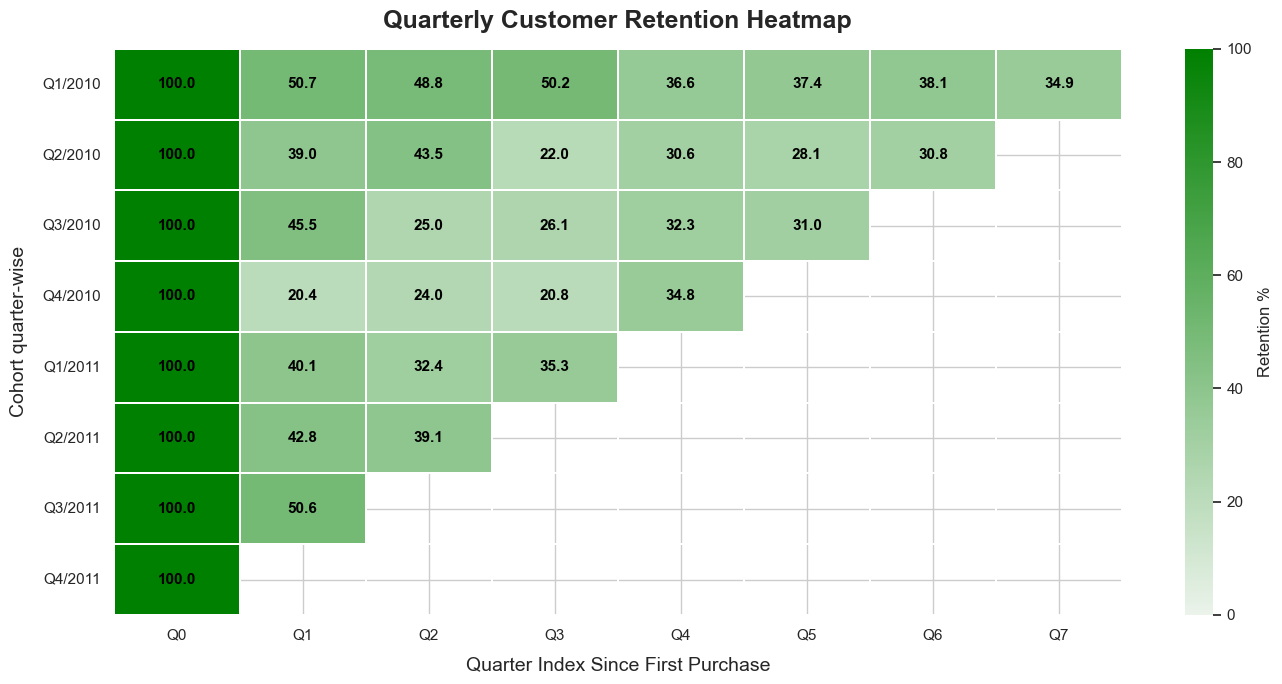

In [411]:
# cohort analysis iam takinf data from jan 2010 to dec2010
chrt=df[(df["Cohortqtr"]>'2009Q4')&(df["Quantity"]>0)].copy()
chrt=chrt.drop(columns=["Cohortqtr"],axis=1)
chrt=chrt.drop(columns=["orderqtr"],axis=1)

chrt["cohortqtr"]=chrt.groupby("Customer ID")["InvoiceDate"].transform(lambda x:x.min()).dt.to_period('Q')
chrt["orderqtr"]=chrt["InvoiceDate"].dt.to_period("Q")
chrt["cohortindex"]=chrt["orderqtr"].astype(int)-chrt["cohortqtr"].astype(int)
active=chrt.groupby(["cohortqtr","cohortindex"])["Customer ID"].nunique().reset_index()

retention_size=active.pivot(index="cohortqtr",columns='cohortindex',values="Customer ID")
cohort_size=retention_size.iloc[:,0]
retention_rate=retention_size.divide(cohort_size,axis=0).mul(1).round(3)*100
retention_rate.index = retention_rate.index.to_series().apply(lambda x: f"Q{x.quarter}/{x.year}")

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

green_cmap = sns.light_palette("green", as_cmap=True)

ax = sns.heatmap(
    retention_rate,
    annot=True,
    fmt='.1f',
    cmap=green_cmap,
    linewidths=0.3,
    linecolor='white',
    cbar_kws={'label': 'Retention %'},
    vmin=0, vmax=100,
    annot_kws={"size": 11, "color": "black", "weight": "bold"}
)

plt.title("Quarterly Customer Retention Heatmap", fontsize=18, weight='bold', pad=15)
plt.xlabel("Quarter Index Since First Purchase", fontsize=14, labelpad=10)
plt.ylabel("Cohort quarter-wise", fontsize=14, labelpad=10)

plt.xticks(
    ticks=[i + 0.5 for i in range(len(retention_rate.columns))],
    labels=[f"Q{i}" for i in range(len(retention_rate.columns))],
    fontsize=11
)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
plt.show()


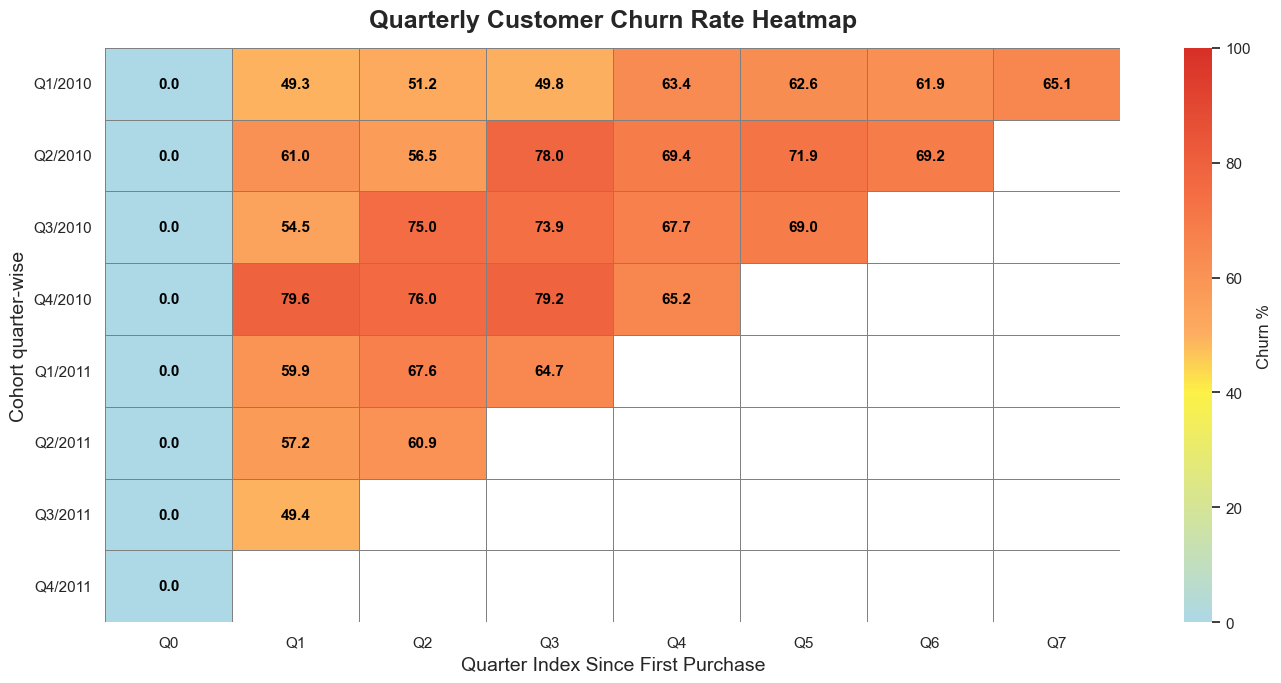

In [433]:
#churn rate
 
from matplotlib.colors import LinearSegmentedColormap
 

churn_rate = 100 - retention_rate

 
colors = [
    (0.00, "#add8e6"),  
    (0.40, "#fdf146"),  
    (0.50, "#fdae61"),  
    (0.75, "#f46d43"),  
    (1.00, "#d73027")   
]

# Convert to LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("CustomChurn", colors)

plt.figure(figsize=(14, 7))
sns.set(style='white')

sns.heatmap(
    churn_rate,
    annot=True,
    fmt='.1f',
    cmap=cmap,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Churn %'},
    vmin=0,
    vmax=100,
    annot_kws={"size": 11, "weight": "bold", "color": "black"}
)

plt.title("Quarterly Customer Churn Rate Heatmap", fontsize=18, weight='bold', pad=15)
plt.xlabel("Quarter Index Since First Purchase", fontsize=14)
plt.ylabel("Cohort quarter-wise", fontsize=14)

plt.xticks(
    ticks=[i + 0.5 for i in range(len(churn_rate.columns))],
    labels=[f"Q{i}" for i in range(len(churn_rate.columns))],
    fontsize=11
)
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()
plt.show()





In [ ]:
#2010q1 doing well,2011q1,2010q3  doing well
#118 showing more 118 these are additiobal discount provide company to boos sale